In [8]:
from cde_utility import *

In [67]:
fR3yx = lambda Rvec: fnRij(Rvec, 3, 1, 0)
fR3xx = lambda Rvec: fnRij(Rvec, 3, 0, 0)
fR3yy = lambda Rvec: fnRij(Rvec, 3, 1, 1)

def band_qsa( kmesh, N_xy, N_z, lat_type, a_o_d=1.0/3.0, if_save_data=True ):
    # parameters
    kw = 0.0
    r0 = [0, 0, 0]
    N_R_z = N_z
    N_R_xy = N_xy

    # Transverse mode(p_z dipole mode)
    beta_z = -np.real( [ Rsum_direct(fR3, N_R_z, r0, kvec, kw, lat) 
                        for kvec in kmesh ] )
    w_T = np.sqrt( 1.0 - a_o_d**3*beta_z )

    # In-plane mode
    beta_11 = np.array( [ Rsum_direct(fR3xx, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )
    beta_11 = 3.0*beta_11 + beta_z

    beta_22 = np.array( [ Rsum_direct(fR3yy, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )
    beta_22 = 3.0*beta_22 + beta_z

    beta_21 = np.array( [ Rsum_direct(fR3yx, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )

    w_TI = 1.0 - a_o_d**3/2.0*\
    ( beta_11 + beta_22 + np.sqrt( (beta_11 - beta_22)**2 + 4.0*beta_21**2 ) )
    w_LI = 1.0 - a_o_d**3/2.0*\
    ( beta_11 + beta_22 - np.sqrt( (beta_11 - beta_22)**2 + 4.0*beta_21**2 ) )
    w_TI = np.sqrt(np.real(w_TI))
    w_LI = np.sqrt(np.real(w_LI))
    if if_save_data:
        np.savetxt('band-qsa-{}-Nz-{}-Nxy-{}.txt'.format(lat_type, N_R_z, N_R_xy),
                   np.c_[w_T, w_TI, w_LI],
                   fmt='%.6f', header='T \t TI \t LI',
                   comments='nk={:d}\n'.format(nk))
    return w_T, w_TI, w_LI

def plot_band_qsa( nk, kmesh, k_labels, w_T, w_TI, w_LI, lat_type, ifsave=True ):
    marker_style = dict(linestyle='-', lw=3, marker='',markersize=5, 
					#markerfacecolor='none', \
                    markerfacecoloralt='gray', markeredgewidth=1.5, \
                    clip_on=False)
    k_index = np.arange(len(kmesh))
    hi_sym_k = [0, nk-1, 2*nk-2, -1]
    hi_sym_k = k_index[hi_sym_k]

    plt.figure(figsize=(8,6))
    plt.plot(  k_index, w_T, 'o', color='orange', **marker_style, label='T mode'  )
    plt.plot( k_index, np.real(w_TI), 'ro', **marker_style, label='TI mode' )
    plt.plot( k_index, np.real(w_LI), 'bo', **marker_style, label='LI mode' )
    plt.xlim((k_index[0], k_index[-1]))
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    plt.ylim((ymin, ymax))
    plt.xticks( hi_sym_k, k_labels, fontsize=22 )
    plt.vlines(hi_sym_k, ymin, ymax, lw=1, color='k')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.title('{} Lattice Quasi-static Band Structure'.format(lat_type))
    plt.legend(loc='best', fontsize=20)
    plt.tight_layout()
    if ifsave:
        plt.savefig('band-qs-{}.pdf'.format(lat_type))
    plt.show()

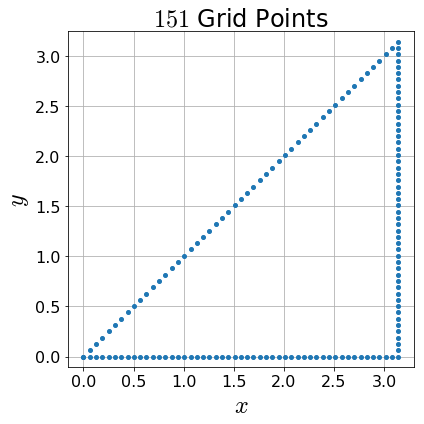

CPU times: user 40.7 s, sys: 10.6 s, total: 51.3 s
Wall time: 28.6 s


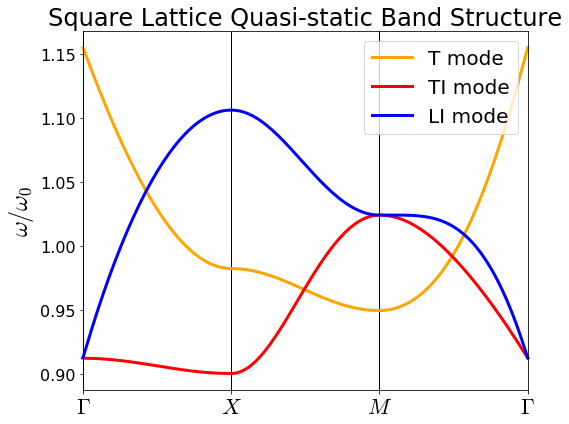

In [37]:
nk = 51
N_xy, N_z = 200, 200
lat_type = 'Square'
k_labels = ['$\Gamma$', '$X$', '$M$', '$\Gamma$']

Gamma = lat.reci_vec(0, 0, 0)
X = lat.reci_vec(0.5, 0, 0)
M = lat.reci_vec(0.5, 0.5, 0)

square_kmesh = np.concatenate([kpath(Gamma, X, nk),
                            kpath(X, M, nk),
                            kpath(M, Gamma, nk, end_point=True)])
plot_grid(square_kmesh)

%time w_T, w_TI, w_LI = band_qsa( square_kmesh, N_xy, N_z, lat_type )
plot_band_qsa( nk, square_kmesh, k_labels, w_T, w_TI, w_LI, lat_type)

[ 1.          0.57735027  0.        ] [ 0.33333333  0.          0.        ]


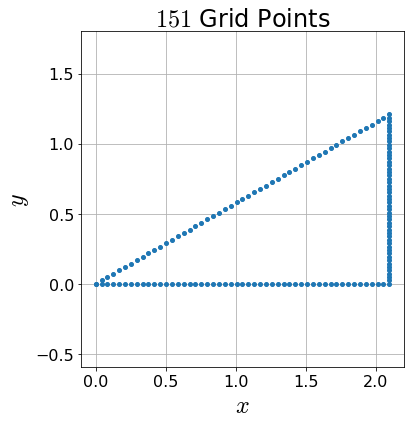

CPU times: user 2min 58s, sys: 57.8 s, total: 3min 56s
Wall time: 3min 5s


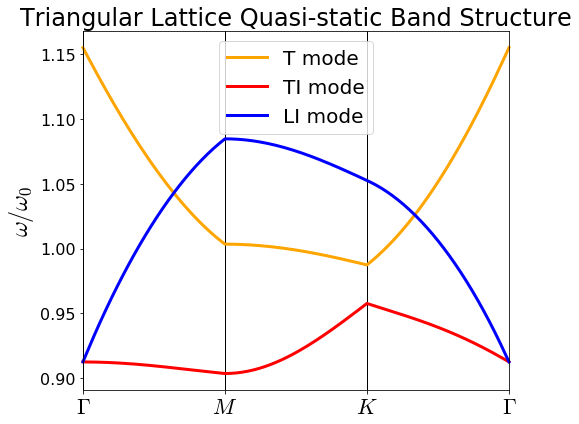

In [80]:
nk = 51
N_xy, N_z = 500, 500
lat_type = 'Triangular'
k_labels = ['$\Gamma$', '$M$', '$K$', '$\Gamma$']

# tri = Lattice(a1=[0.5, -0.5*np.sqrt(3), 0], 
#               a2=[0.5, 0.5*np.sqrt(3), 0], 
#               a3=[0, 0, 1])
tri = Lattice(a1=[3/2, np.sqrt(3)/2, 0], 
              a2=[3/2, -np.sqrt(3)/2, 0], 
              a3=[0, 0, -1])

Gamma = lat.reci_vec(0, 0, 0)
M = tri.reci_vec( 0.5, 0.5, 0 )
K = tri.reci_vec( 2/3, 1/3, 0)
print(K/twopi*3, M/twopi)

tri_kmesh = np.concatenate([kpath(Gamma, M, nk),
                            kpath(M, K, nk),
                            kpath(K, Gamma, nk, end_point=True)])
plot_grid(tri_kmesh)

%time w_T, w_TI, w_LI = band_qsa( tri_kmesh, N_xy, N_z, lat_type )

plot_band_qsa( nk, tri_kmesh, k_labels, w_T, w_TI, w_LI, lat_type)

In [78]:
lat_test = tri
k_test = K
nums = np.arange(10, 2500, 200)
# f3 =  [ Rsum_direct(fR3, nz, r0, k_test, kw, lat) for nz in nums ]
f3 =  [ Rsum_direct(fR3yx, nz, r0, k_test, kw, lat) for nz in nums ]

sums = np.array(f3)
err_re = rel_err( sums.real[1:], sums.real[:-1] )
err_im = rel_err( sums.imag[1:], sums.imag[:-1] )

power1, y1 = np.polyfit(np.log(nums[:-1]), np.log(np.fabs(err_re)), 1)
# print(power1, y1)
power2, y2 = np.polyfit(np.log(nums[:-1]), np.log(np.fabs(err_im)), 1)
# print(power2, y2)

label1 = r'$\mathrm{Re}(\frac{\Delta S}{S})$' + \
r'$\approx N^{{ {:.2f} }}$'.format(power1)
label2 = r'$\mathrm{Im}(\frac{\Delta S}{S})$' + \
r'$\approx N^{{ {:.2f} }}$'.format(power2)

# plt.rc('text', usetex=False)
# plt.rc('font', family='sans')

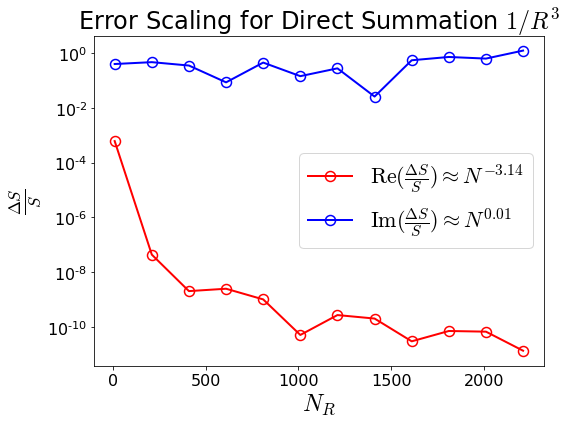

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.semilogy(nums[:-1], np.fabs(err_re), 'ro-', 
             label=label1, **marker_style)
# plt.semilogy(Ns[:-1], np.power(Ns[:-1], power1)*np.exp(y1), 'ko-')
plt.semilogy(nums[:-1], np.fabs(err_im), 'bo-',
             label=label2, **marker_style)
plt.xlabel(r'$N_R$')
plt.ylabel(r'$\frac{\Delta S}{S}$')
plt.title(r'Error Scaling for Direct Summation $1/R^3$')
plt.legend(loc='best', fontsize=22)
plt.tight_layout()
plt.savefig('direct-sum-error-R3-tri-K-point.pdf')
plt.show()

In [74]:
f3[-2], f3[-1]

((-0.67564553375271397+5.305628684594051e-16j),
 (-0.67564553372211966+1.766960699310368e-16j))